In [1]:
pip install pandas numpy scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('ethereum_historical_data.csv')

# Create feature columns
data['30_day_avg'] = data['price'].rolling(window=30).mean().shift(1)
data['10_day_avg'] = data['price'].rolling(window=10).mean().shift(1)
data['daily_return'] = data['price'].pct_change().shift(1)

# Drop NA values
data.dropna(inplace=True)

# Define features and target variable
X = data[['30_day_avg', '10_day_avg', 'daily_return']]
y = data['price']

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, tree_pred))

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))

# Neural Network Model (Multi-Layer Perceptron)
nn_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_pred))

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

print(f"Decision Tree RMSE: {tree_rmse:.2f}")
print(f"Linear Regression RMSE: {linear_rmse:.2f}")
print(f"Neural Network RMSE: {nn_rmse:.2f}")
print(f"Random Forest RMSE: {rf_rmse:.2f}")


Decision Tree RMSE: 162.86
Linear Regression RMSE: 129.30
Neural Network RMSE: 137.29
Random Forest RMSE: 122.07


In [3]:
from joblib import dump

# Save the models to disk
dump(tree_model, 'decision_tree_model.joblib')
dump(linear_model, 'linear_regression_model.joblib')
dump(nn_model, 'neural_network_model.joblib')
dump(rf_model, 'random_forest_model.joblib')


['random_forest_model.joblib']

RECURSIVE APPROACH FOR PREDICTION

In [4]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

# Load the historical data
data = pd.read_csv('ethereum_historical_data.csv')

# Generate the necessary features
data['10_day_avg'] = data['price'].rolling(window=10).mean()
data['30_day_avg'] = data['price'].rolling(window=30).mean()
data['daily_return'] = data['price'].pct_change()
data = data.dropna()

# Splitting the dataset into training and testing
X = data[['10_day_avg', '30_day_avg', 'daily_return']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
decision_tree_model = DecisionTreeRegressor().fit(X_train, y_train)
linear_regression_model = LinearRegression().fit(X_train, y_train)
neural_network_model = MLPRegressor(max_iter=2000).fit(X_train, y_train)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Define a function to generate features for prediction
def generate_features(data, days=10):
    future_data = pd.DataFrame(index=np.arange(0, days))
    future_data['price'] = data['price'].iloc[-1]
    future_data['10_day_avg'] = data['10_day_avg'].iloc[-1]
    future_data['30_day_avg'] = data['30_day_avg'].iloc[-1]
    future_data['daily_return'] = data['daily_return'].iloc[-1]

    for day in range(1, days):
        future_data['price'].iloc[day] = future_data['price'].iloc[day-1]
        future_data['10_day_avg'].iloc[day] = (future_data['10_day_avg'].iloc[day-1]*10 - data['price'].iloc[-11+day] + future_data['price'].iloc[day-1]) / 10
        future_data['30_day_avg'].iloc[day] = (future_data['30_day_avg'].iloc[day-1]*30 - data['price'].iloc[-31+day] + future_data['price'].iloc[day-1]) / 30
        future_data['daily_return'].iloc[day] = future_data['price'].iloc[day] / future_data['price'].iloc[day-1] - 1

    return future_data[['10_day_avg', '30_day_avg', 'daily_return']]

# Generate features for the next 10 days
future_features = generate_features(data)

# Ensure feature order matches the order during training
feature_order = ['10_day_avg', '30_day_avg', 'daily_return']
future_features = future_features[feature_order]

# Predict with each model
decision_tree_predictions = decision_tree_model.predict(future_features)
linear_regression_predictions = linear_regression_model.predict(future_features)
neural_network_predictions = neural_network_model.predict(future_features)
random_forest_predictions = random_forest_model.predict(future_features)

# Print the predictions
print("Decision Tree Predictions:", decision_tree_predictions)
print("Linear Regression Predictions:", linear_regression_predictions)
print("Neural Network Predictions:", neural_network_predictions)
print("Random Forest Predictions:", random_forest_predictions)


Decision Tree Predictions: [1639.02131872 1639.02131872 1639.02131872 1639.02131872 1639.02131872
 1639.02131872 1639.02131872 1639.02131872 1639.02131872 1639.02131872]
Linear Regression Predictions: [1640.93504873 1639.07117983 1638.29110752 1638.18790053 1628.70945201
 1622.24560206 1623.04862494 1625.63234522 1627.47303389 1629.43588172]
Neural Network Predictions: [1639.30655295 1639.84014441 1639.05375226 1638.94533583 1629.43692986
 1622.95120074 1623.75161928 1626.33741804 1628.17842589 1630.14182497]
Random Forest Predictions: [1634.59800081 1623.44491444 1624.68280446 1627.36681599 1636.61109818
 1652.78967824 1637.02161474 1658.71587227 1673.46133547 1673.60027822]


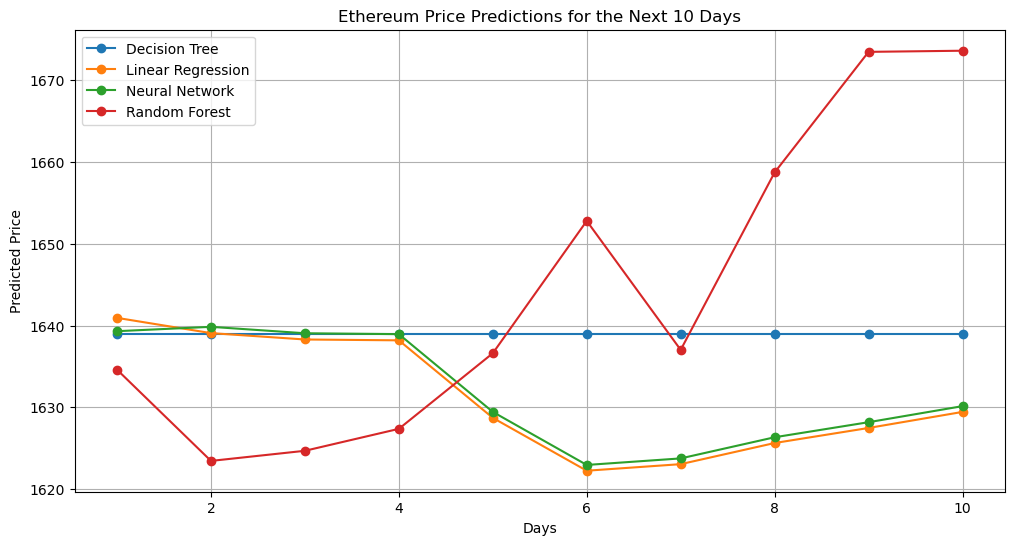

In [6]:
import matplotlib.pyplot as plt

days = np.arange(1, 11)  # Representing the next 10 days

plt.figure(figsize=(12, 6))

# Plotting the predictions
plt.plot(days, decision_tree_predictions, '-o', label="Decision Tree")
plt.plot(days, linear_regression_predictions, '-o', label="Linear Regression")
plt.plot(days, neural_network_predictions, '-o', label="Neural Network")
plt.plot(days, random_forest_predictions, '-o', label="Random Forest")  # Adding Random Forest predictions

# Adding title and labels
plt.title("Ethereum Price Predictions for the Next 10 Days")
plt.xlabel("Days")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)

plt.show()


In [8]:
print(future_features.columns.tolist())


['10_day_avg', '30_day_avg', 'daily_return']


In [9]:
print(X_train.columns.tolist())


['10_day_avg', '30_day_avg', 'daily_return']
